# Vanilla CNN

```
CNN 에서 가장 기본적으로 사용되는 합성곱 방식

"2D spatial Feature" 을 추출하는 필터로 구성

같은 위치에 해당하는 모든 채널에 가중치 부여
```

# 영상 데이터 예측 by vanilla CNN template

# 데이터 준비

In [1]:
!pip install gdown

In [2]:
# orginal shared link : https://drive.google.com/file/d/1_l-0FUDU1EovwlhnILnrrC0labjWtgCJ/view?usp=sharing
!gdown https://drive.google.com/uc?id=1_l-0FUDU1EovwlhnILnrrC0labjWtgCJ

Downloading...
From: https://drive.google.com/uc?id=1_l-0FUDU1EovwlhnILnrrC0labjWtgCJ
To: /content/cat_face_keypoint.zip
100% 201M/201M [00:02<00:00, 88.5MB/s]


In [3]:
!unzip cat_face_keypoint.zip

Archive:  cat_face_keypoint.zip
  inflating: cat_image_and_keypoint.npy  
  inflating: memo.txt                


In [4]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import mobilenet_v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
img_size = 224

https://www.kaggle.com/crawford/cat-dataset 의
고양이 영상 파일과 레이블링 데이터를 읽고 numpy 파일로 저장해 두었다. <br>


In [6]:
numpy_data = np.load('cat_image_and_keypoint.npy', allow_pickle=True)
dic_data = numpy_data.item()
x = np.array(dic_data.get('imgs'))
y = np.array(dic_data.get('lmks'))

In [7]:
print(x.shape)
print(y.shape)

(1706, 224, 224, 3)
(1706, 18)


## 이미지 보기

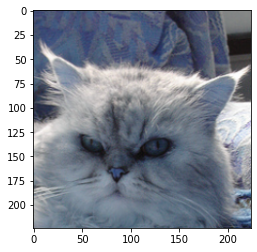

[ 59 135 128 137  85 177  32  93  19  48  50  64 172  72 205  67 188 106]


In [8]:
plt.imshow(x[0])
plt.show()
print(y[0])

## normalization

In [9]:
x = x / 255.

## 키 포인트 보기

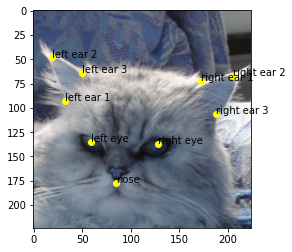

In [10]:
target_x = x[0]
target_y = y[0]

plt.imshow(target_x)

plt.scatter(target_y[0], target_y[1], color='yellow')
plt.text(target_y[0], target_y[1], 'left eye')
plt.scatter(target_y[2], target_y[3], color='yellow')
plt.text(target_y[2], target_y[3], 'right eye')
plt.scatter(target_y[4], target_y[5], color='yellow')
plt.text(target_y[4], target_y[5], 'nose')
plt.scatter(target_y[6], target_y[7], color='yellow')
plt.text(target_y[6], target_y[7], 'left ear 1')
plt.scatter(target_y[8], target_y[9], color='yellow')
plt.text(target_y[8], target_y[9], 'left ear 2')
plt.scatter(target_y[10], target_y[11], color='yellow')
plt.text(target_y[10], target_y[11], 'left ear 3')
plt.scatter(target_y[12], target_y[13], color='yellow')
plt.text(target_y[12], target_y[13], 'right ear 1')
plt.scatter(target_y[14], target_y[15], color='yellow')
plt.text(target_y[14], target_y[15], 'right ear 2')
plt.scatter(target_y[16], target_y[17], color='yellow')
plt.text(target_y[16], target_y[17], 'right ear 3')

plt.show()

## 코만 추리기

코에 해당하는 인덱스 4, 5만 추림

In [11]:
nose_y = y[:,4:6]

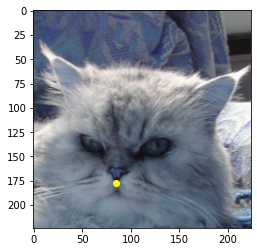

In [12]:
target_x = x[0]
target_y = nose_y[0]

plt.imshow(target_x)
plt.scatter(target_y[0], target_y[1], color='yellow')
plt.show()

## 데이터 분리

In [13]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, nose_y, test_size=0.2, shuffle=True)

# Template

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

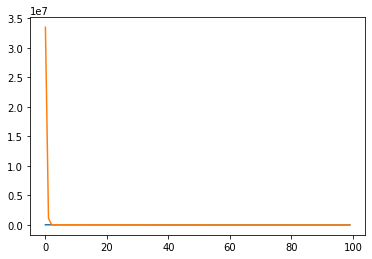

11/11 [==============================] - 2s 132ms/step - loss: 437.3916 - mae: 15.7150
loss= 437.3915710449219
mape= 15.715015411376953


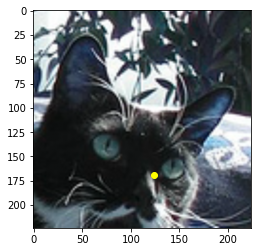

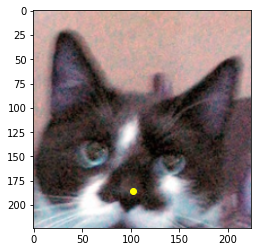

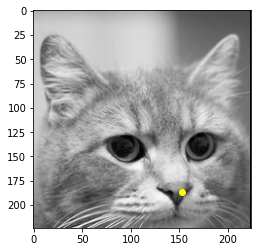

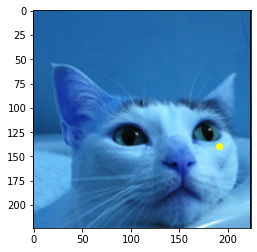

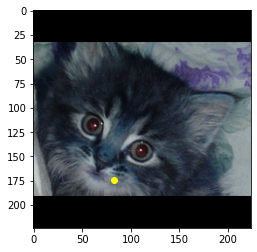

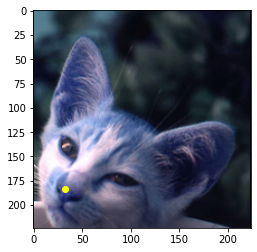

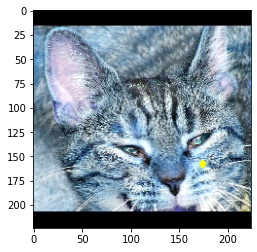

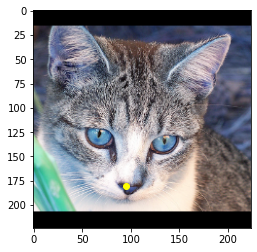

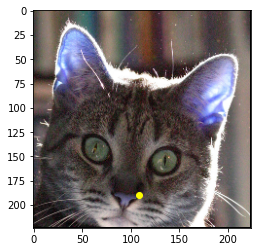

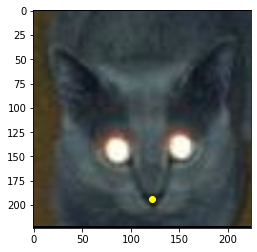

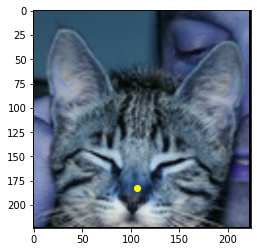

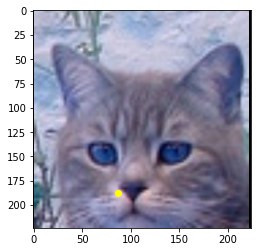

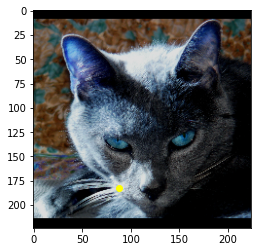

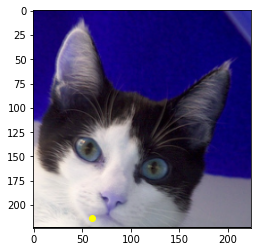

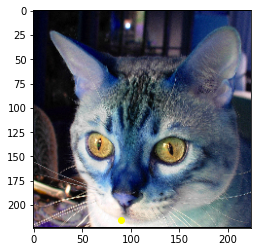

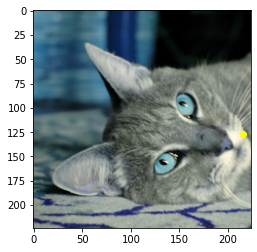

In [14]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

model = keras.Sequential()
model.add(Input((224,224,3)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2))

model.summary()

model.compile(optimizer='Adam', loss='mse', metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, batch_size=64, validation_split=0.1, verbose=1)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



predicted = model.predict(test_x[:16])

for i in range(16):
  plt.imshow(test_x[i])
  plt.scatter(predicted[i][0], predicted[i][1], color='yellow')
  plt.show()

